<a href="https://colab.research.google.com/github/venkateshchandle/bis/blob/main/cellular_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

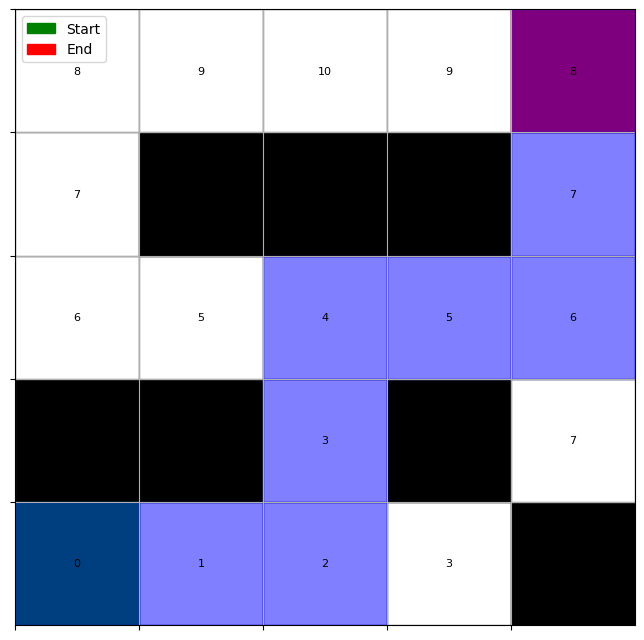

Distance Grid:
[[ 0.  1.  2.  3. inf]
 [inf inf  3. inf  7.]
 [ 6.  5.  4.  5.  6.]
 [ 7. inf inf inf  7.]
 [ 8.  9. 10.  9.  8.]]
Shortest Path:
[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def parallel_cellular_shortest_path(grid, start, end, max_iterations=100):
    rows, cols = grid.shape
    distance = np.full((rows, cols), np.inf)
    distance[start] = 0

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for iteration in range(max_iterations):
        updated = False
        new_distance = distance.copy()
        for i in range(rows):
            for j in range(cols):
                if grid[i][j] == 1:
                    continue
                for d in directions:
                    ni, nj = i + d[0], j + d[1]
                    if 0 <= ni < rows and 0 <= nj < cols:
                        if distance[ni][nj] + 1 < new_distance[i][j]:
                            new_distance[i][j] = distance[ni][nj] + 1
                            updated = True
        distance = new_distance
        if not updated:
            break

    path = []
    if distance[end] == np.inf:
        print("No path found.")
        visualize_grid(grid, start, end, path, distance)
        return distance, path

    current = end
    path.append(current)
    while current != start:
        i, j = current
        for d in directions:
            ni, nj = i + d[0], j + d[1]
            if 0 <= ni < rows and 0 <= nj < cols:
                if distance[ni][nj] == distance[i][j] - 1:
                    path.append((ni, nj))
                    current = (ni, nj)
                    break
    path.reverse()
    visualize_grid(grid, start, end, path, distance)
    return distance, path


def visualize_grid(grid, start, end, path, distance):
    rows, cols = grid.shape
    fig, ax = plt.subplots(figsize=(8, 8))


    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == 1:
                ax.add_patch(plt.Rectangle((j, rows - i - 1), 1, 1, color="black"))  # Blocked cells
            else:
                ax.add_patch(plt.Rectangle((j, rows - i - 1), 1, 1, edgecolor="gray", facecolor="white"))

    ax.add_patch(plt.Rectangle((start[1], rows - start[0] - 1), 1, 1, color="green", label="Start"))
    ax.add_patch(plt.Rectangle((end[1], rows - end[0] - 1), 1, 1, color="red", label="End"))
    if path:
        for (x, y) in path:
            ax.add_patch(plt.Rectangle((y, rows - x - 1), 1, 1, color="blue", alpha=0.5))
    for i in range(rows):
        for j in range(cols):
            if np.isfinite(distance[i, j]):
                ax.text(j + 0.5, rows - i - 1 + 0.5, f"{int(distance[i, j])}",
                        color="black", ha="center", va="center", fontsize=8)

    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_xticks(range(cols))
    ax.set_yticks(range(rows))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.legend(loc="upper left")
    plt.gca().invert_yaxis()
    plt.show()


if __name__ == "__main__":
    grid = np.array([
        [0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0]
    ])

    start = (0, 0)
    end = (4, 4)

    distance, path = parallel_cellular_shortest_path(grid, start, end)
    print("Distance Grid:")
    print(distance)
    print("Shortest Path:")
    print(path)
